In [1]:
import pandas as pd
import numpy as np
import nablachem.space as ncs
import random
from nablachem.space import algos
from sf_functions import *

# Step 1 
##### Create the chemical space with nablachem. The conditions must be the same as GDB-13 incluides

In [2]:
# Define SearchSpace

c = ncs.ApproximateCounter(show_progress=False)
s = ncs.SearchSpace("H:1 C:4 O:2 N:3 Cl:1 S:2 S:4")
selection = ncs.Q("C + O + N + S + Cl <= 13") 

sf_sum, size_sum = [], [] # Initialize empty lists to store results

for natoms in range(1, 42):  # 1..41 ((13 * 2 + 2) + 13) #28 max H and 13 max C. 
    random_order, sizes, stoichiometries = algos.chemical_formula_database(
        c, s, natoms, selection
        )
    sf_sum.extend(random_order)
    size_sum.extend(sizes)

print(f"Total unique formulas: {len(sf_sum)}")
print(f"Total estimated molecules: {sum(size_sum):.3e}")

Partition over valences: 100%|██████████| 13244/13244 [01:36<00:00, 137.08it/s]

Total unique formulas: 52453
Total estimated molecules: 1.100e+15


In [265]:
# To follow the logic of the previous code

filtered_sf = sf_sum 
filtered_sizes = size_sum

In [266]:
#display 10 random SMILES from the filtered list

random_sampling = random.sample(filtered_sf,10)
print(random_sampling)

['C6H5Cl2N3', 'C7H16O3S3', 'C4H8Cl2S6', 'C3H13ClN2O2S3', 'C4H2ClNO2S2', 'C2H14N6OS3', 'C3H10Cl4OS4', 'C3H5ClN4S5', 'C6H20N2S4', 'C5HClO2']


In [267]:
space_df = pd.DataFrame({
    "SF": filtered_sf,        
    "Frequency_space": filtered_sizes  
})

display(space_df)

,SF,Frequency_space
0,OS,3
1,Cl2,1
2,H2,1
3,C2,1
4,O2,1
...,...,...
52448,C12H28S,8330
52449,C3H28S10,1354
52450,C10H28S3,1354
52451,CH28S12,8330


In [268]:
print(space_df["Frequency_space"].sum())

1100374510353140


In [269]:
#Counting the number of processed molecules

total_molecules_space = space_df["Frequency_space"].sum()
print(f"Number of processed molecules: {total_molecules_space}")

Number of processed molecules: 1100374510353140


# Step 2
##### Upload the dataset of gdb_sf

In [270]:
gdb_df = pd.read_csv("gdb13_sf_counts.csv") #data already extracted and saved in a .csv file
display(gdb_df)

,SF,Count
0,CH4,1
1,C10H10,2197
2,C10H12,5995
3,C10H14,9322
4,C10H16,8073
...,...,...
3769,C3HClN2O2S,2
3770,C4H2N2O2S,10
3771,C3HN3O2S,4
3772,C6H2O2S,1


In [271]:
gdb_df.rename(columns={"Count":"Frequency_gdb"}, inplace=True)
gdb_df

,SF,Frequency_gdb
0,CH4,1
1,C10H10,2197
2,C10H12,5995
3,C10H14,9322
4,C10H16,8073
...,...,...
3769,C3HClN2O2S,2
3770,C4H2N2O2S,10
3771,C3HN3O2S,4
3772,C6H2O2S,1


In [272]:
#Counting the number of processed molecules

total_molecules = gdb_df["Frequency_gdb"].sum()
print(f"Number of processed molecules: {total_molecules}")

Number of processed molecules: 977468254


In [273]:
#Counting the number of processed molecules

total_molecules_gdb = gdb_df["Frequency_gdb"].sum()
print(f"Number of processed molecules: {total_molecules_gdb}")

Number of processed molecules: 977468254


# Step 3
##### Merge the 2 dataset

In [274]:
#apply the function to order the SF in both datasets
space_df['SF'] = space_df['SF'].apply(ordered_SF)
gdb_df['SF'] = gdb_df['SF'].apply(ordered_SF)

merge the 2 df

In [275]:
merged_gdb = pd.merge(space_df, gdb_df, on='SF', how='outer' )
merged_gdb = merged_gdb.fillna(0) #Filling na with 0

display(merged_gdb)

,SF,Frequency_space,Frequency_gdb
0,C10,4330,1.0
1,C10Cl2,64352,0.0
2,C10Cl2H10,4626313,250.0
3,C10Cl2H10O,13457095,3133.0
4,C10Cl2H10S,26380855,403.0
...,...,...,...
52448,S5,28,0.0
52449,S6,97,0.0
52450,S7,359,0.0
52451,S8,1635,0.0


In [276]:
#Display  random values

merged_random = merged_gdb.sample(20)
display(merged_random)

,SF,Frequency_space,Frequency_gdb
16321,C4Cl2H8O7,64036,0.0
47658,ClH6N3O7S2,3194815,0.0
25731,C6Cl3H17S4,5521,0.0
35823,CCl5H6N5S,12495,0.0
3559,C2Cl5H4N3S3,28438642,0.0
32429,C9S2,1856776,0.0
7381,C2H3NO5S,69115,0.0
32337,C9H6O2,9660231,4284.0
6108,C2H10O4S5,59029504,0.0
38998,CH12O2S8,86873707,0.0


In [277]:
print(f"The size of the GBD-13 database is: {total_molecules_gdb}, and the size of the space is: {total_molecules_space}")

The size of the GBD-13 database is: 977468254, and the size of the space is: 1100374510353140


In [297]:
total_molecules_gdb/total_molecules_space

8.883050677776096e-07

In [278]:
#Export the dataframe as a .csv file
merged_gdb.to_csv("merged_gdb_space.csv", index=False)

# Step 4
##### Plot and statistics

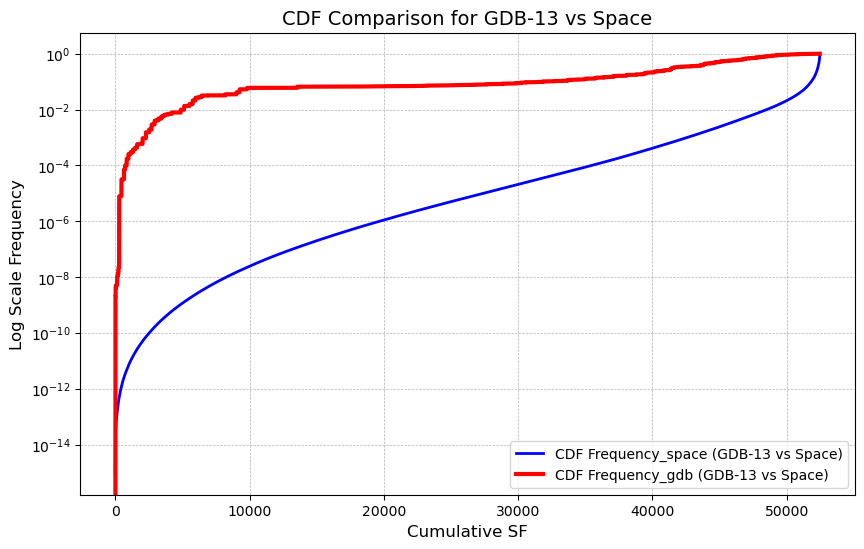

In [279]:
#1
plot_cdfs(data_frame=merged_gdb, 
        distribution_one="Frequency_space", 
        distribution_two="Frequency_gdb", 
        dataset_name="GDB-13 vs Space")

In [280]:
#2
metrics = calculate_metrics(merged_gdb, "Frequency_space", "Frequency_gdb")

Calculated Metrics:
                                            Metric        Value
                                      KS Statistic     0.436283
                       Area under Distribution One 30087.076749
                       Area under Distribution Two 34835.913996
                             Area between the CDFs  8822.315448
Percentage Area Difference (relative to max curve)    25.325345
                            KL Divergence (P || Q)    16.389027


In [281]:
# Define sample franctions and n_bootstrap
sample_sizes_list = [0.001, 0.01, 0.1, 0.15, 0.2, 0.5, 0.8, 1.0]  # from 0,1% to 100%
n_bootstrap, alpha = 1000, 0.05

In [282]:
#3
confidence_intervals = bootstrap_metrics(merged_gdb, 
                                        "Frequency_space",
                                        "Frequency_gdb", 
                                        n_bootstrap, 
                                        alpha)

Metric     Value Confidence Interval
    KS  0.122178      [0.063, 0.213]
 KL_PQ 16.356569    [15.704, 17.023]


In [283]:
#4
random_results = random_sampling_subset(merged_gdb, 
                                        "Frequency_space", 
                                        "Frequency_gdb", 
                                        sample_sizes_list, 
                                        n_bootstrap)

 Sample Fraction       KS     KL_PQ    KL_QP
           0.001 0.942308 21.671733 4.478111
           0.010 0.956190 20.170014 6.678099
           0.100 0.926215 18.057167 8.943868
           0.150 0.929715 19.273844 9.571958
           0.200 0.926985 17.682399 9.286529
           0.500 0.928735 16.690298 8.914369
           0.800 0.929126 16.789327 9.468978
           1.000 0.928050 16.389027 9.187259


In [284]:
# Normalise the frequency of each sum formula in the space
merged_gdb["Space_weight"] = merged_gdb["Frequency_space"] / merged_gdb["Frequency_space"].sum()

merged_gdb["gdb_weight"] = merged_gdb["Frequency_gdb"] / merged_gdb["Frequency_gdb"].sum()
merged_gdb

,SF,Frequency_space,Frequency_gdb,Space_weight,gdb_weight
0,C10,4330,1.0,3.935024e-12,1.023051e-09
1,C10Cl2,64352,0.0,5.848191e-11,0.000000e+00
2,C10Cl2H10,4626313,250.0,4.204308e-09,2.557628e-07
3,C10Cl2H10O,13457095,3133.0,1.222956e-08,3.205219e-06
4,C10Cl2H10S,26380855,403.0,2.397443e-08,4.122896e-07
...,...,...,...,...,...
52448,S5,28,0.0,2.544588e-14,0.000000e+00
52449,S6,97,0.0,8.815181e-14,0.000000e+00
52450,S7,359,0.0,3.262526e-13,0.000000e+00
52451,S8,1635,0.0,1.485858e-12,0.000000e+00


# Space vs Space subsets

In [285]:
# Inputs
sample_sizes_list = [1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9] #max size possible to give is "1e-10"
n_repeats = 100
alpha = 0.05

# Total number of molecules already calculated
total_molecules = merged_gdb['Frequency_space'].sum()
print(f"Total molecules = {total_molecules:,}")

# Create 'SF' column for indexing
merged_gdb["SF"] = merged_gdb.index

# Normalize Space_weight
merged_gdb["Space_weight_normalized"] = merged_gdb["Space_weight"] / merged_gdb["Space_weight"].sum()

# Results storage
results = []

for frac in sample_sizes_list:
    s_size = int(frac * total_molecules)

    probabilities = merged_gdb["Space_weight"].values / merged_gdb["Space_weight"].sum()

    ks_vals = []
    kl_vals = []
    for _ in range(n_repeats):
        if frac == 1:
            # Special case: identical distributions
            df_sample = merged_gdb.copy()
            df_sample["Selected_molecules"] = merged_gdb["Frequency_space"]
            df_sample["Space_weight_sampled"] = df_sample["Selected_molecules"] / df_sample["Selected_molecules"].sum()
        else:
            # Proportional sampling using probabilities
            selected_counts = np.random.multinomial(s_size, probabilities)
            df_sample = pd.DataFrame({
                'SF': merged_gdb["SF"],  # Use indexed column
                'Selected_molecules': selected_counts
            })

            # Calculate Space_weight for the subspace
            df_sample["Space_weight_sampled"] = df_sample["Selected_molecules"] / df_sample["Selected_molecules"].sum()

        # Reorder to avoid misalignment
        df_sample = df_sample.set_index('SF').reindex(merged_gdb["SF"]).fillna(0)

        # Compute KS
        ks_stat = max(abs(merged_gdb["Space_weight_normalized"].cumsum() - df_sample["Space_weight_sampled"].cumsum()))
        ks_vals.append(ks_stat)

        # Compute KL
        p = df_sample["Space_weight_sampled"].values + 1e-10  # Avoid log(0)
        q = merged_gdb["Space_weight_normalized"].values + 1e-10
        KL_PQ = entropy(p, q)
        kl_vals.append(KL_PQ)

    # Compute statistics and confidence intervals
    ks_mean = np.mean(ks_vals)
    kl_mean = np.mean(kl_vals)
    lower_p = 100 * (alpha / 2)
    upper_p = 100 * (1 - alpha / 2)
    ks_low, ks_up = np.percentile(ks_vals, [lower_p, upper_p])
    kl_low, kl_up = np.percentile(kl_vals, [lower_p, upper_p])

    results.append({
        "Sample Fraction": frac,
        "Sample Size": s_size,
        "KS_Mean": ks_mean,
        "KS_CI_95": f"[{ks_low:.4f}, {ks_up:.4f}]",
        "KL_PQ_Mean": kl_mean,
        "KL_PQ_CI_95": f"[{kl_low:.4f}, {kl_up:.4f}]"
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

display(results_df)

Total molecules = 1,100,374,510,353,140


,Sample Fraction,Sample Size,KS_Mean,KS_CI_95,KL_PQ_Mean,KL_PQ_CI_95
0,1.000000e-15,1,0.733411,"[0.5141, 0.9710]",5.898679,"[2.5947, 10.1782]"
1,1.000000e-14,11,0.238517,"[0.1305, 0.4047]",3.581612,"[2.4273, 4.9783]"
2,1.000000e-13,110,0.081126,"[0.0434, 0.1411]",1.758895,"[1.4529, 2.0478]"
3,1.000000e-12,1100,0.025414,"[0.0149, 0.0468]",0.612751,"[0.5673, 0.6740]"
4,1.000000e-11,11003,0.008145,"[0.0044, 0.0145]",0.172408,"[0.1642, 0.1810]"
5,1.000000e-10,110037,0.002519,"[0.0013, 0.0046]",0.039151,"[0.0381, 0.0401]"
6,1.000000e-09,1100374,0.000833,"[0.0005, 0.0015]",0.006884,"[0.0067, 0.0071]"


In [286]:
#Export the dataframe as a .csv file
results_df.to_csv("gdb_1.csv", index=False)

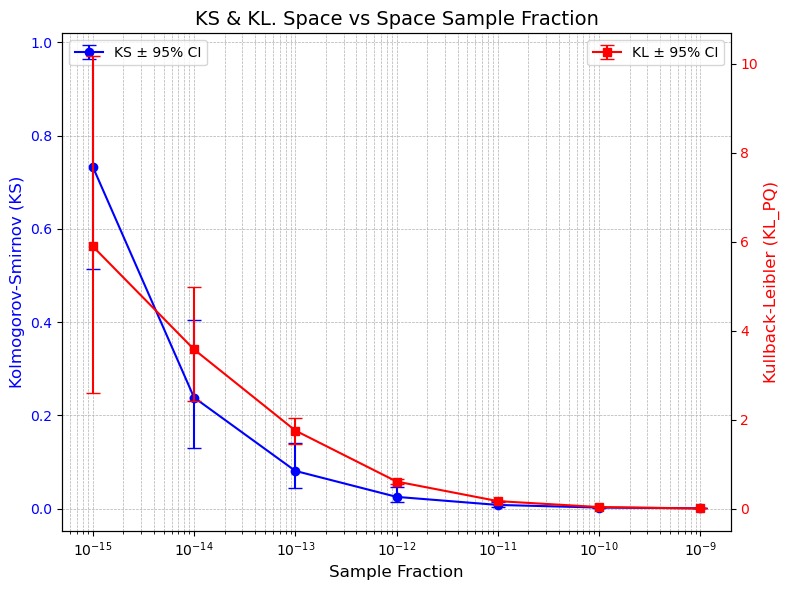

In [287]:
# Extract data
fractions = results_df["Sample Fraction"]

# KS Data
ks_means = results_df["KS_Mean"]
ks_cis = results_df["KS_CI_95"].str.strip("[]").str.split(", ").apply(lambda x: [float(v) for v in x])
ks_lower = [mean - ci[0] if mean >= ci[0] else 0 for mean, ci in zip(ks_means, ks_cis)]
ks_upper = [ci[1] - mean if ci[1] >= mean else 0 for mean, ci in zip(ks_means, ks_cis)]

# KL Data
kl_means = results_df["KL_PQ_Mean"]
kl_cis = results_df["KL_PQ_CI_95"].str.strip("[]").str.split(", ").apply(lambda x: [float(v) for v in x])
kl_lower = [mean - ci[0] if mean >= ci[0] else 0 for mean, ci in zip(kl_means, kl_cis)]
kl_upper = [ci[1] - mean if ci[1] >= mean else 0 for mean, ci in zip(kl_means, kl_cis)]

# Create figure and first Y-axis (KS)
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot KS
ax1.set_xscale("log")
ax1.set_xlabel("Sample Fraction", fontsize=12)
ax1.set_ylabel("Kolmogorov-Smirnov (KS)", color="blue", fontsize=12)
ax1.errorbar(fractions, ks_means, yerr=[ks_lower, ks_upper], fmt='o-', color="blue", capsize=5, label="KS ± 95% CI")
ax1.tick_params(axis='y', labelcolor="blue")

# Create second Y-axis (KL)
ax2 = ax1.twinx()
ax2.set_ylabel("Kullback-Leibler (KL_PQ)", color="red", fontsize=12)
ax2.errorbar(fractions, kl_means, yerr=[kl_lower, kl_upper], fmt='s-', color="red", capsize=5, label="KL ± 95% CI")
ax2.tick_params(axis='y', labelcolor="red")

# Title and Grid
plt.title("KS & KL. Space vs Space Sample Fraction", fontsize=14)
ax1.grid(True, which="both", linestyle="--", linewidth=0.5)

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

## GDB vs GDB subsets

In [288]:
# Inputs
sample_sizes_list = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
n_repeats = 100
alpha = 0.05

# Total number of molecules already calculated
total_molecules = merged_gdb['Frequency_gdb'].sum()
print(f"Total molecules = {total_molecules:,}")

# Results storage
results = []

for frac in sample_sizes_list:
    s_size = int(frac * total_molecules)

    ks_vals = []
    kl_vals = []
    for _ in range(n_repeats):
        # Random sampling based on gdb_weight
        probabilities = merged_gdb["gdb_weight"].values / merged_gdb["gdb_weight"].sum()
        counts = np.random.multinomial(s_size, probabilities)
        df_sample = pd.DataFrame({
            'SF': merged_gdb.index,
            'Selected_molecules': counts
        })

        # Calculate ani_weight for the subspace
        df_sample["gdb_weight_sampled"] = df_sample["Selected_molecules"] / df_sample["Selected_molecules"].sum()

        # Normalize original ani_weight
        merged_gdb["gdb_weight_normalized"] = merged_gdb["gdb_weight"] / merged_gdb["gdb_weight"].sum()

        # Calculate KS
        ks_stat = np.max(np.abs(merged_gdb["gdb_weight_normalized"].cumsum() - df_sample["gdb_weight_sampled"].cumsum()))
        KS = ks_stat
        ks_vals.append(KS)

        # Calculate KL divergence
        p = df_sample["gdb_weight_sampled"]
        q = merged_gdb["gdb_weight_normalized"]
        KL_PQ = entropy(p, q)  # KL divergence
        kl_vals.append(KL_PQ)
    
    ks_mean = np.mean(ks_vals)
    kl_mean = np.mean(kl_vals)
    lower_p = 100 * (alpha / 2)
    upper_p = 100 * (1 - alpha / 2)
    ks_low, ks_up = np.percentile(ks_vals, [lower_p, upper_p])
    kl_low, kl_up = np.percentile(kl_vals, [lower_p, upper_p])
    
    results.append({
        "Sample Fraction": frac,
        "Sample Size": s_size,
        "KS_Mean": ks_mean,
        "KS_CI_95": f"[{ks_low:.4f}, {ks_up:.4f}]",
        "KL_PQ_Mean": kl_mean,
        "KL_PQ_CI_95": f"[{kl_low:.4f}, {kl_up:.4f}]"
    })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
display(results_df)

Total molecules = 977,468,254.0


,Sample Fraction,Sample Size,KS_Mean,KS_CI_95,KL_PQ_Mean,KL_PQ_CI_95
0,1.000000e-08,9,0.268251,"[0.1602, 0.4135]",3.124913,"[2.4483, 3.9897]"
1,1.000000e-07,97,0.088813,"[0.0422, 0.1502]",1.194735,"[0.9811, 1.4474]"
2,1.000000e-06,977,0.025005,"[0.0141, 0.0376]",0.298164,"[0.2597, 0.3323]"
3,1.000000e-05,9774,0.008769,"[0.0053, 0.0139]",0.058549,"[0.0549, 0.0637]"
4,1.000000e-04,97746,0.002704,"[0.0015, 0.0042]",0.009727,"[0.0091, 0.0103]"


In [289]:
#Export the dataframe as a .csv file
results_df.to_csv("gdb_2.csv", index=False)

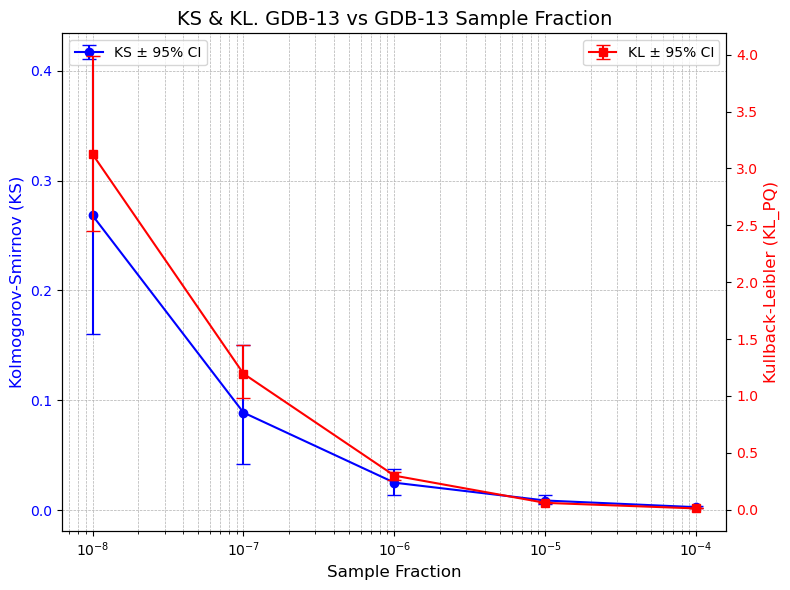

In [290]:
# Extract data
fractions = results_df["Sample Fraction"]

# KS Data
ks_means = results_df["KS_Mean"]
ks_cis = results_df["KS_CI_95"].str.strip("[]").str.split(", ").apply(lambda x: [float(v) for v in x])
ks_lower = [mean - ci[0] if mean >= ci[0] else 0 for mean, ci in zip(ks_means, ks_cis)]
ks_upper = [ci[1] - mean if ci[1] >= mean else 0 for mean, ci in zip(ks_means, ks_cis)]

# KL Data
kl_means = results_df["KL_PQ_Mean"]
kl_cis = results_df["KL_PQ_CI_95"].str.strip("[]").str.split(", ").apply(lambda x: [float(v) for v in x])
kl_lower = [mean - ci[0] if mean >= ci[0] else 0 for mean, ci in zip(kl_means, kl_cis)]
kl_upper = [ci[1] - mean if ci[1] >= mean else 0 for mean, ci in zip(kl_means, kl_cis)]

# Create figure and first Y-axis (KS)
fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.set_xscale("log")
ax1.set_xlabel("Sample Fraction", fontsize=12)
ax1.set_ylabel("Kolmogorov-Smirnov (KS)", color="blue", fontsize=12)
ax1.errorbar(fractions, ks_means, yerr=[ks_lower, ks_upper], fmt='o-', color="blue", capsize=5, label="KS ± 95% CI")
ax1.tick_params(axis='y', labelcolor="blue")

# Create second Y-axis (KL)
ax2 = ax1.twinx()
ax2.set_ylabel("Kullback-Leibler (KL_PQ)", color="red", fontsize=12)
ax2.errorbar(fractions, kl_means, yerr=[kl_lower, kl_upper], fmt='s-', color="red", capsize=5, label="KL ± 95% CI")
ax2.tick_params(axis='y', labelcolor="red")

# Title and Grid
plt.title("KS & KL. GDB-13 vs GDB-13 Sample Fraction", fontsize=14)
ax1.grid(True, which="both", linestyle="--", linewidth=0.5)

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

## GDB vs Space subsets

In [291]:
# Inputs
sample_sizes_list = [1e-15, 1e-14, 1e-13, 1e-12, 1e-11] #max size possible to give is "1e-10" "1e-10"
n_repeats = 100
alpha = 0.05


# Results storage
results = []

for frac in sample_sizes_list:
    s_size = int(frac * total_molecules_space)
    ks_vals = []
    kl_vals = []
    
    for _ in range(n_repeats):
        # Random sampling from Space
        probabilities_space = merged_gdb["Frequency_space"].values / merged_gdb["Frequency_space"].sum()
        counts_space = np.random.multinomial(s_size, probabilities_space)
        df_sample_space = pd.DataFrame({
            'SF': merged_gdb.index,
            'Selected_molecules': counts_space
        })

        # Calculate sampled Space weights
        df_sample_space["space_weight_sampled"] = df_sample_space["Selected_molecules"] / df_sample_space["Selected_molecules"].sum()

        # Normalize QM weights
        merged_gdb["gdb_weight_normalized"] = merged_gdb["Frequency_gdb"] / merged_gdb["Frequency_gdb"].sum()

        # Add smoothing to avoid division by zero or log(0)
        df_sample_space["space_weight_sampled"] += 1e-10
        merged_gdb["gdb_weight_normalized"] += 1e-10

        # Calculate KS
        ks_stat = np.max(np.abs(
            merged_gdb["gdb_weight_normalized"].cumsum() - df_sample_space["space_weight_sampled"].cumsum()
        ))
        KS = ks_stat
        ks_vals.append(KS)

        # Calculate KL divergence
        p = df_sample_space["space_weight_sampled"]
        q = merged_gdb["gdb_weight_normalized"]
        KL_PQ = entropy(p, q)  # KL divergence
        kl_vals.append(KL_PQ)
    
    # Calculate statistics
    ks_mean = np.mean(ks_vals)
    kl_mean = np.mean(kl_vals)
    lower_p = 100 * (alpha / 2)
    upper_p = 100 * (1 - alpha / 2)
    ks_low, ks_up = np.percentile(ks_vals, [lower_p, upper_p])
    kl_low, kl_up = np.percentile(kl_vals, [lower_p, upper_p])
    
    results.append({
        "Sample Fraction": frac,
        "Sample Size": s_size,
        "KS_Mean": ks_mean,
        "KS_CI_95": f"[{ks_low:.4f}, {ks_up:.4f}]",
        "KL_PQ_Mean": kl_mean,
        "KL_PQ_CI_95": f"[{kl_low:.4f}, {kl_up:.4f}]"
    })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)

display(results_df)

,Sample Fraction,Sample Size,KS_Mean,KS_CI_95,KL_PQ_Mean,KL_PQ_CI_95
0,1.000000e-15,1,0.608281,"[0.5123, 1.0000]",21.957824,"[10.3015, 23.0257]"
1,1.000000e-14,11,0.456226,"[0.4166, 0.5474]",20.024094,"[18.0535, 20.8799]"
2,1.000000e-13,110,0.435950,"[0.4146, 0.4419]",18.197287,"[17.6171, 18.6956]"
3,1.000000e-12,1100,0.436501,"[0.4328, 0.4406]",16.997467,"[16.7829, 17.2020]"
4,1.000000e-11,11003,0.436327,"[0.4348, 0.4376]",16.559453,"[16.4860, 16.6170]"


In [292]:
#Export the dataframe as a .csv file
results_df.to_csv("gdb_3.csv", index=False)

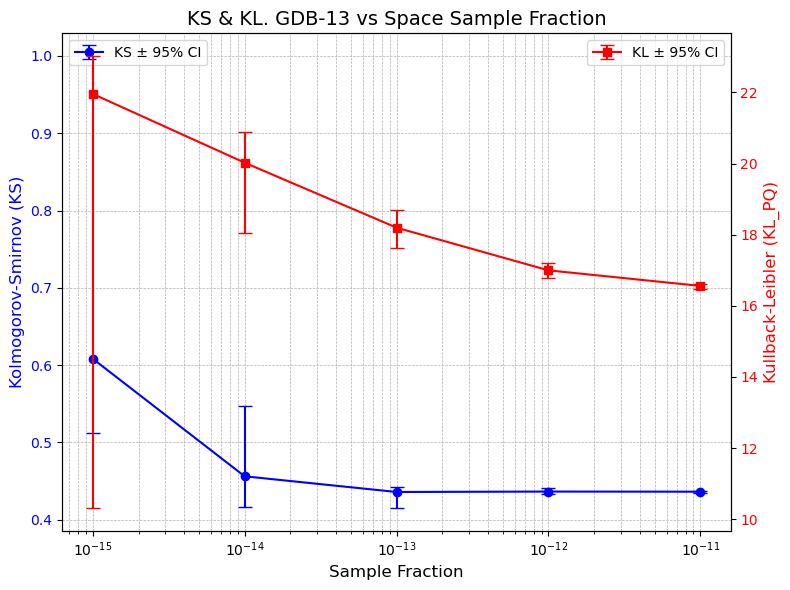

In [293]:
# Extract data
fractions = results_df["Sample Fraction"]

# KS Data
ks_means = results_df["KS_Mean"]
ks_cis = results_df["KS_CI_95"].str.strip("[]").str.split(", ").apply(lambda x: [float(v) for v in x])
ks_lower = [mean - ci[0] if mean >= ci[0] else 0 for mean, ci in zip(ks_means, ks_cis)]
ks_upper = [ci[1] - mean if ci[1] >= mean else 0 for mean, ci in zip(ks_means, ks_cis)]

# KL Data
kl_means = results_df["KL_PQ_Mean"]
kl_cis = results_df["KL_PQ_CI_95"].str.strip("[]").str.split(", ").apply(lambda x: [float(v) for v in x])
kl_lower = [mean - ci[0] if mean >= ci[0] else 0 for mean, ci in zip(kl_means, kl_cis)]
kl_upper = [ci[1] - mean if ci[1] >= mean else 0 for mean, ci in zip(kl_means, kl_cis)]

# Create figure and first Y-axis (KS)
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot KS
ax1.set_xscale("log")
ax1.set_xlabel("Sample Fraction", fontsize=12)
ax1.set_ylabel("Kolmogorov-Smirnov (KS)", color="blue", fontsize=12)
ax1.errorbar(fractions, ks_means, yerr=[ks_lower, ks_upper], fmt='o-', color="blue", capsize=5, label="KS ± 95% CI")
ax1.tick_params(axis='y', labelcolor="blue")

# Create second Y-axis (KL)
ax2 = ax1.twinx()
ax2.set_ylabel("Kullback-Leibler (KL_PQ)", color="red", fontsize=12)
ax2.errorbar(fractions, kl_means, yerr=[kl_lower, kl_upper], fmt='s-', color="red", capsize=5, label="KL ± 95% CI")
ax2.tick_params(axis='y', labelcolor="red")

# Title and Grid
plt.title("KS & KL. GDB-13 vs Space Sample Fraction", fontsize=14)
ax1.grid(True, which="both", linestyle="--", linewidth=0.5)

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

# Chemical Space vs GDB-13 Sample Fraction

In [294]:
sample_sizes_list = [1e-8, 1e-7, 1e-6, 1e-5] 
results = []

for frac in sample_sizes_list:
    s_size = int(frac * total_molecules_gdb)
    ks_vals = []
    kl_vals = []

    for _ in range(n_repeats):
        # 1. Sampling from QM9
        probabilities = merged_gdb["Frequency_gdb"].values / merged_gdb["Frequency_gdb"].sum()
        counts = np.random.multinomial(s_size, probabilities)
        df_sample = pd.DataFrame({
            'SF': merged_gdb.index,
            'Selected_molecules': counts
        })

        df_sample["gdb_weight_sampled"] = df_sample["Selected_molecules"] / df_sample["Selected_molecules"].sum()

        # 2. Reference: Chemical Space
        merged_gdb["space_weight_normalized"] = merged_gdb["Frequency_space"] / merged_gdb["Frequency_space"].sum()

        # 3. Numerical smoothing (prevent KL log(0))
        df_sample["gdb_weight_sampled"] += 1e-10
        merged_gdb["space_weight_normalized"] += 1e-10

        # 4. Kolmogorov–Smirnov
        ks_stat = np.max(np.abs(
            merged_gdb["space_weight_normalized"].cumsum() - df_sample["gdb_weight_sampled"].cumsum()
        ))
        ks_vals.append(ks_stat)

        # 5. Kullback–Leibler divergence
        p = df_sample["gdb_weight_sampled"]
        q = merged_gdb["space_weight_normalized"]
        KL_PQ = entropy(p, q)
        kl_vals.append(KL_PQ)

    # Final statistics
    ks_mean = np.mean(ks_vals)
    kl_mean = np.mean(kl_vals)
    lower_p = 100 * (alpha / 2)
    upper_p = 100 * (1 - alpha / 2)
    ks_low, ks_up = np.percentile(ks_vals, [lower_p, upper_p])
    kl_low, kl_up = np.percentile(kl_vals, [lower_p, upper_p])

    results.append({
        "Sample Fraction": frac,
        "Sample Size": s_size,
        "KS_Mean": ks_mean,
        "KS_CI_95": f"[{ks_low:.4f}, {ks_up:.4f}]",
        "KL_PQ_Mean": kl_mean,
        "KL_PQ_CI_95": f"[{kl_low:.4f}, {kl_up:.4f}]"
    })

results_df = pd.DataFrame(results)
display(results_df)

,Sample Fraction,Sample Size,KS_Mean,KS_CI_95,KL_PQ_Mean,KL_PQ_CI_95
0,1.000000e-08,9,0.569022,"[0.4388, 0.8839]",12.372803,"[10.3344, 14.4602]"
1,1.000000e-07,97,0.447669,"[0.3976, 0.5305]",10.356516,"[9.8545, 10.9996]"
2,1.000000e-06,977,0.434597,"[0.4077, 0.4601]",9.492987,"[9.3408, 9.6779]"
3,1.000000e-05,9774,0.435810,"[0.4261, 0.4440]",9.241514,"[9.1849, 9.3062]"


In [295]:
#Export the dataframe as a .csv file
results_df.to_csv("gdb_4.csv", index=False)

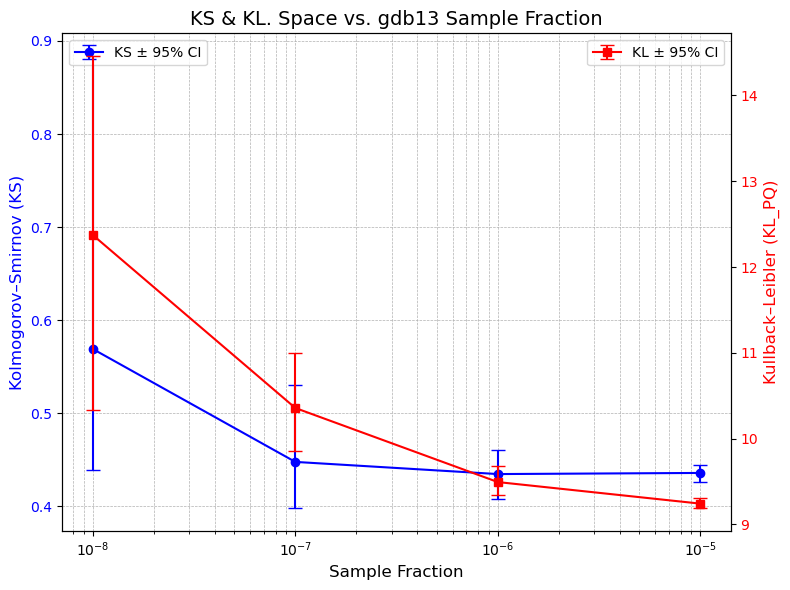

In [296]:
# Extract data  

fractions = results_df["Sample Fraction"]

# KS
ks_means = results_df["KS_Mean"]
ks_cis = results_df["KS_CI_95"].str.strip("[]").str.split(", ").apply(lambda x: [float(v) for v in x])
ks_lower = [mean - ci[0] if mean >= ci[0] else 0 for mean, ci in zip(ks_means, ks_cis)]
ks_upper = [ci[1] - mean if ci[1] >= mean else 0 for mean, ci in zip(ks_means, ks_cis)]

# KL
kl_means = results_df["KL_PQ_Mean"]
kl_cis = results_df["KL_PQ_CI_95"].str.strip("[]").str.split(", ").apply(lambda x: [float(v) for v in x])
kl_lower = [mean - ci[0] if mean >= ci[0] else 0 for mean, ci in zip(kl_means, kl_cis)]
kl_upper = [ci[1] - mean if ci[1] >= mean else 0 for mean, ci in zip(kl_means, kl_cis)]

#Create figure nd first Y-axis (KS)
fig, ax1 = plt.subplots(figsize=(8, 6))

# KS plot
ax1.set_xscale("log")
ax1.set_xlabel("Sample Fraction", fontsize=12)
ax1.set_ylabel("Kolmogorov–Smirnov (KS)", color="blue", fontsize=12)
ax1.errorbar(fractions, ks_means, yerr=[ks_lower, ks_upper],
             fmt='o-', color="blue", capsize=5, label="KS ± 95% CI")
ax1.tick_params(axis='y', labelcolor="blue")

# KL plot
ax2 = ax1.twinx()
ax2.set_ylabel("Kullback–Leibler (KL_PQ)", color="red", fontsize=12)
ax2.errorbar(fractions, kl_means, yerr=[kl_lower, kl_upper],
             fmt='s-', color="red", capsize=5, label="KL ± 95% CI")
ax2.tick_params(axis='y', labelcolor="red")

plt.title("KS & KL. Space vs. gdb13 Sample Fraction", fontsize=14)
ax1.grid(True, which="both", linestyle="--", linewidth=0.5)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()